# Fill in the topo

There are a bunch of 0's in the upper left part of the topo which may have an influence on the wind. Just use a linear interpolation for now.

In [7]:
import xarray as xr
import numpy as np

In [2]:
topo = xr.load_dataset('../topo.nc')

dem = topo.dem.where(topo.dem > 1475).bfill(dim='x')
topo['dem'] = dem

topo.to_netcdf('../topo_filled.nc', format='NETCDF4')


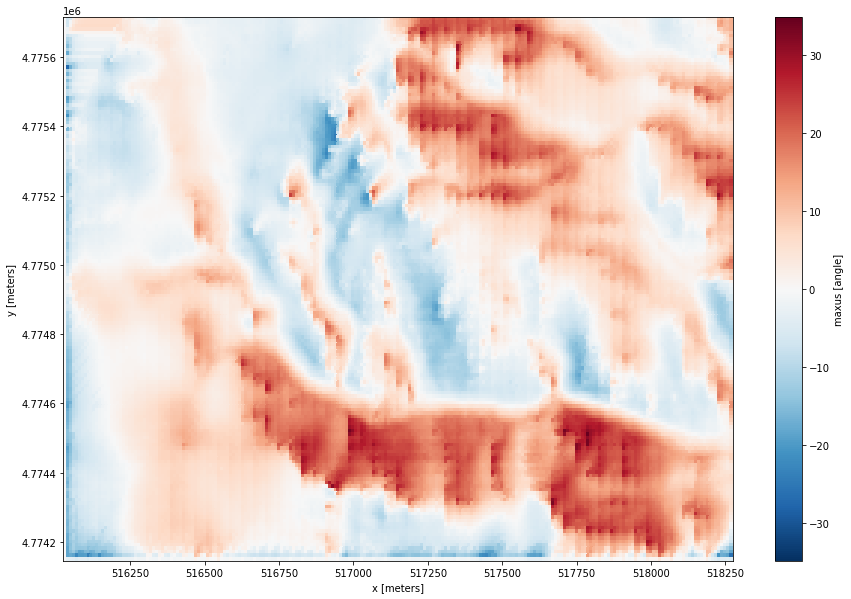

In [3]:
maxus = xr.load_dataset('../maxus_30window.nc')
maxus.maxus.sel(Direction=46).plot(figsize=(15,10))


In [15]:
topo = xr.load_dataset('../topo/topo.nc')

zeros = np.zeros_like(topo.dem.values)

topo['veg_type'].values = 1 + zeros
topo['veg_height'].values = zeros
topo['veg_k'].values = zeros
topo['veg_tau'].values = 1 + zeros

topo.to_netcdf('../topo/topo_noveg.nc', format='NETCDF4')
topo

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SerializationWarning: saving variable veg_type with floating point data as an integer dtype without any _FillValue to use for NaNs
  # Remove the CWD from sys.path while we load stuff.


<xarray.Dataset>
Dimensions:     (x: 225, y: 157)
Coordinates:
  * y           (y) float32 4775710.0 4775700.0 ... 4774160.0 4774150.0
  * x           (x) float32 516030.0 516040.0 516050.0 ... 518260.0 518270.0
Data variables:
    veg_height  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dem         (y, x) float32 1733.7007 1730.128 ... 1513.549 1517.049
    veg_type    (y, x) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    mask        (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    veg_k       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veg_tau     (y, x) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    projection  |S1 b''
Attributes:
    last_modified:       [2019-11-14 20:40:34] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-11-14 20:40:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-11-14 20:40:34] Create netCDF4 file using Basi...
    institution:         USDA Agricultural Research Service, Northwest Waters...
    generation_command:  /usr/local/bin/basin_setup -f delineation/basin_outl...